# Homework Assignment 2
PHYS5318 Principles of Experimental Physics – Spring 2024\
Due: Tuesday February 27th by 11:59 PM.

Please save this notebook as a PDF and submit on canvas. Make sure to include comments that explain your code, clearly label your plots and make sure to include answers to any questions posed.

## Question 1
Look at the data for problem 1 (in 'data_prob1.txt') showing x and y data for 10 repeats of an experiment. You want to 
test a power-law (y = Ax<sup>p</sup>) model for the data.

In [36]:
# Import the libraries/modules that we know we will be using
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [37]:
# First we need to load the data file for the first problem into a data array and look at the data.

data1 = pd.read_csv("data_prob1.txt", sep='\t')

data1

,x,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10
0,0.20,4.13,5.34,5.57,-5.35,5.22,0.20,5.50,0.90,2.87,-3.99
1,0.36,1.88,2.81,1.47,-0.14,-0.10,7.04,7.42,3.81,2.46,-6.24
2,0.51,1.40,-2.80,0.77,-4.21,6.99,11.68,1.93,2.97,2.32,3.83
3,0.65,7.45,16.75,13.39,10.25,7.44,8.29,14.95,10.24,1.80,4.71
4,0.79,3.09,2.94,10.90,6.82,1.32,3.31,11.56,6.54,7.08,10.68
5,0.92,12.98,15.11,8.54,16.78,21.57,-0.94,13.90,14.11,7.14,8.01
6,1.05,20.14,4.18,8.93,10.36,20.60,14.78,19.81,5.78,15.25,21.58
7,1.17,16.62,17.49,10.59,20.28,18.78,11.26,26.14,21.25,24.63,11.68
8,1.29,22.02,24.77,11.18,22.47,18.49,20.47,20.19,17.73,4.57,22.07
9,1.42,26.39,14.57,25.06,16.14,22.92,25.06,23.41,31.48,28.97,20.55


### Question 1a
For each x value, determine the average y value, \<y>, and its uncertainty. Present these values in a table.\
Determine the best power-law fit to the (x,\<y>) data by finding the minimum $\chi^{2}$ ($\chi^{2}_{min}$). You should write your own code to compute $\chi^{2}$, rather than using built-in functions such as [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Report $\chi^{2}_{min}$, $\chi^{2}_{red}$ (reduced $\chi^{2}$), A, and p. Find the A and p uncertainties using the $\chi^{2}_{min}+1$ method in 2D (see section 11.5 in the book).

In [38]:
# get y column names and filter data1 DataFrame for y data values
y_columns = data1.columns[1:]
data1_yvalues = data1[y_columns].to_numpy()

# calculate average y `y_avg` and standard error in y `y_ste`
y_avg = [np.mean(y_data) for y_data in data1_yvalues]
# calculate uncertainty in the mean 'y_ste' (note that the `np.std` function uses 0 delta degrees of freedom by default, but we should use ddof=1 to unbias data)
y_ste = [np.std(y_data, ddof=1) / np.sqrt(len(y_data)) for y_data in data1_yvalues]

In [39]:
# Show the calculated values
pd.DataFrame({ "x": data1["x"], "y_avg": y_avg, "y_ste": y_ste })

,x,y_avg,y_ste
0,0.20,2.039,1.274319
1,0.36,2.041,1.229668
2,0.51,2.488,1.430210
3,0.65,9.527,1.455427
4,0.79,6.424,1.174397
5,0.92,11.720,1.975682
6,1.05,14.141,2.047762
7,1.17,17.872,1.728405
8,1.29,18.396,1.929474
9,1.42,23.455,1.665873


In [40]:
# Extract the x data from the DataFrame
x = data1['x']

# Define the power law function
def power_law(x, A, p):
    return A*x**p

# Define chi squared function
# the input 'b' should be an array where p[0] = A and p[1] = p 
# you can use your x, y_avg, and y_ste arrays directly in the function, and numpy (np) functions to do elementwise array math
def chi_squared(b):
    y_pred = power_law(x, b[0], b[1])
    diff = y_avg - y_pred
    chi_sq = np.sum((diff / y_ste) ** 2)
    return chi_sq

In [41]:
# minimize chi^2 using `sp.optimize.minimize` and an initial guess
initial_guess = [10,2] # guess that seems reasonable based on data
minimum = sp.optimize.minimize(chi_squared, initial_guess)

In [42]:
# extract the minimum chi^2 value and A and p values from `minimum`
chi_sq_min = minimum.fun
A, p = minimum.x

In [43]:
# calculate degrees of freedom and reduced chi^2 
dof = len(y_avg) - len(initial_guess) # 2 fit parameters
chi_sq_red = chi_sq_min / dof

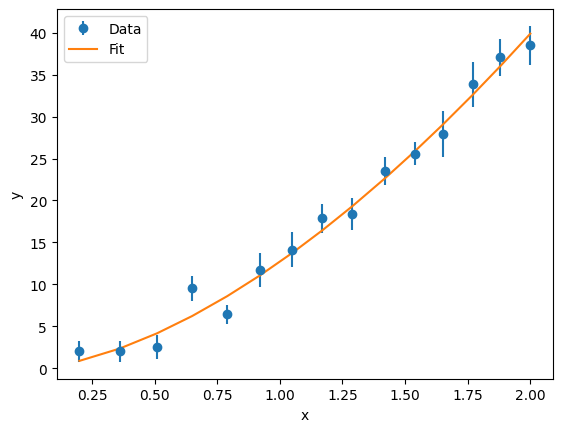

In [44]:
# Plot the data (as points) with the fit (as a line)
y_fit= power_law(x, A, p)
data_plot = plt.errorbar(x, y_avg, yerr=y_ste, fmt='o', label="Data")
fit_plot = plt.plot(x, y_fit, label="Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Reorder the labels on the legend so that the data is first
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

In [45]:
# Find the uncertainties in the fit parameters using the chi_squared_min + 1 method
# Hint: try using a grid search to determine the values of chi_squared in an area
# around the minimum in parameter space

# To find where the chi squared value is chi squared_min + 1, do a grid search near the minimum
# We create a grid of possible A and p values to search for where chi_sq = chi_sq_min + 1

# assign a range for possible A and p values
Arange = 5
prange = 0.5

# create a grid of possible A and p values to search for where chi_sq = chi_sq_min + 1
possible_As = np.linspace(A - Arange, A + Arange, 100)
possible_ps = np.linspace(p - prange, p + prange, 100)

# Loop over every cell in our grid and compute what chi squared is for that A and p
# Store our results in a matrix whose indices correspond to the A and p values
chi_sq_grid = np.zeros((possible_As.shape[0], possible_ps.shape[0]))
for i, Ac in enumerate(possible_As):
    for j, pc in enumerate(possible_ps):
        chi_sq_grid[i, j] = chi_squared([Ac, pc])

In [46]:
# Use this grid to determine the uncertainties in A and p using the chi squared + 1 method
# Hint: create a mask of grid cells that meet the desired condition

# Find the min and max of an array
def minmax(array):
    return np.min(array), np.max(array)

# Now we want to find the extreme values where chi_sq = chi_sq_min + 1 for each parameter (A and p)
# To do this, we first find the values where chi squared is less than the min + 1
# This is a boolean mask (matrix of T/F values)
lte_min_plus_1 = chi_sq_grid <= (chi_sq_min + 1)

# We only want A and p values where this happens at least once
# For example, start w/A
# We want find A values where ANY p value allows this to work
# the axes of this grid are 0: A, 1: p so we do this operation along axis 1
A_indices = lte_min_plus_1.any(axis=0)
p_indices = lte_min_plus_1.any(axis=1)

# Then we take the min and max values of A where this condition is satisfied
A_min, A_max = minmax(possible_As[A_indices])
p_min, p_max = minmax(possible_As[p_indices])

# The uncertainty is half of this range
sigma_A = (A_max - A_min)/2

# Repeat this process for p
sigma_p = (p_max - p_min)/2

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jwdes\AppData\Local\Temp\ipykernel_24544\3568298227.py:11: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Mask Matrix for $\chi^2 \leq \chi^2_{min}+1$")


Text(0.5, 1.0, 'Mask Matrix for $\\chi^2 \\leq \\chi^2_{min}+1$')

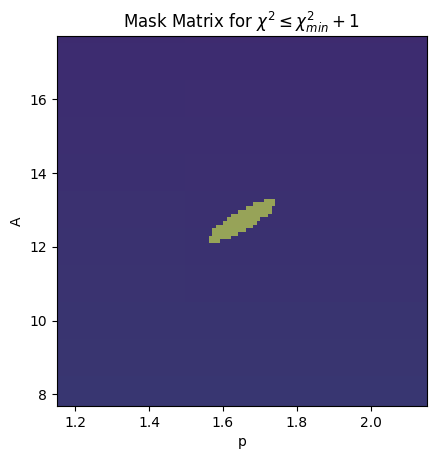

In [47]:
# This plots the chi-squared grid as an image
# and uses the extent to set the axis labels correctly
# The set of values where chi_sq <= chi_sq_min + 1 is then plotted as an image mask
plt.imshow(chi_sq_grid)
mask = lte_min_plus_1.astype(int)
Amin, Amax = minmax(possible_As)
pmin, pmax = minmax(possible_ps)
plt.imshow(mask, alpha=0.5, extent=[pmin, pmax, Amin, Amax], aspect=(pmax-pmin)/(Amax-Amin))
plt.xlabel("p")
plt.ylabel("A")
plt.title("Mask Matrix for $\chi^2 \leq \chi^2_{min}+1$")

In [48]:
# print problem 1.a results

print('PROBLEM 1.a RESULTS:')

print('min chi^2 is', chi_sq_min)
print('A is', A)
print('p is', p)
print('reduced chi^2 is', chi_sq_red)
print('uncertainty in A is', sigma_A)
print('uncertainty in p is', sigma_p)

PROBLEM 1.a RESULTS:
min chi^2 is 13.13633574257596
A is 12.695578199168947
p is 1.6512447533933017
reduced chi^2 is 1.0104873648135355
uncertainty in A is 0.858585858585859
uncertainty in p is 0.5555555555555554


### Question 1b

Linearize the data and use ordinary least squares (OLS) to fit the linearized data using an analytical function (matrix algebra). Find A and p.

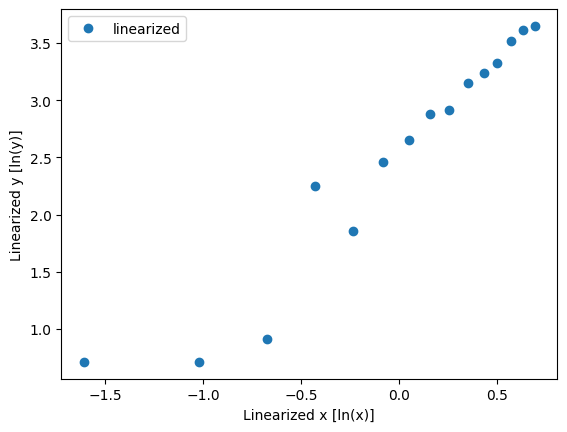

In [49]:
# Linearize the data

# applying a log to the exponential fuction linearizes the data
x_lin = np.log(x)
y_lin = np.log(y_avg)

# Plot to check that it looks linear

fig, ax = plt.subplots()
ax.plot(x_lin, y_lin, 'o', label = "linearized")
ax.set_ylabel("Linearized y [ln(y)]")
ax.set_xlabel("Linearized x [ln(x)]")

ax.legend()

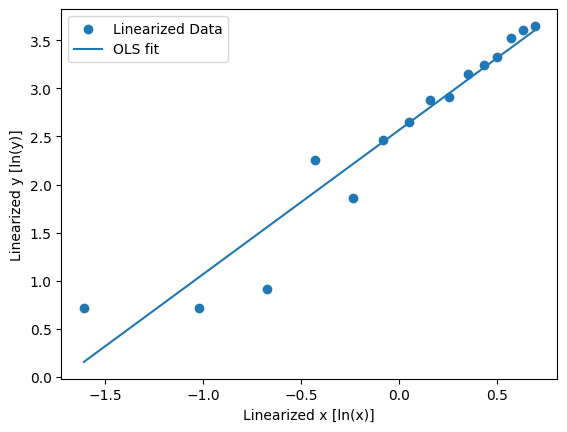

In [50]:
# Now estimate the best-fit parameters using the ordinary least squares (OLS) method
# Hint: To perform matrix multiplication using numpy, you can use
# either `np.matmul`: https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
# or the `.dot` method of `numpy.ndarray`: https://numpy.org/doc/1.21/reference/generated/numpy.ndarray.dot.html
#
# To create the transpose of a matrix, you can use `np.transpose`: https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
# To find the inverse of a matrix, use `np.linalg.inv`: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

# Construct a matrix with a column of all ones, and a column of our x values
ones = np.ones((len(x)))
X_ls = np.stack((ones, x_lin), axis=1)

# Do the computation to determine the OLS best-fit parameters
# The matrix of best-fit parameters is (X_lsT * X_ls)^(-1) * X_lsT * y
# where X_lsT is the transpose of X_ls
X_lsT = np.transpose(X_ls)

# you can use np.matmul or .dot functions for matrix math
# Perform the matrix multiplication to determine the OLS best-fit parameters
ols_parameters = np.linalg.inv(X_lsT.dot(X_ls)).dot(X_lsT).dot(y_lin)
intercept_ols, slope_ols = ols_parameters

# plot linearized data
y_ols_lin = slope_ols * x_lin + intercept_ols
plt.scatter(x_lin, y_lin, label="Linearized Data")
plt.plot(x_lin, y_ols_lin, label="OLS fit")
plt.xlabel("Linearized x [ln(x)]")
plt.ylabel("Linearized y [ln(y)]")
plt.legend()

In [51]:
# Now, determine A and p from the slope and intercept
from math import exp

p_ols = slope_ols
A_ols = exp(intercept_ols)

In [52]:
# print results for problem 1.b
print('PROBLEM 1.b RESULTS (OLS):')
print('A is', A_ols)
print('p is', p_ols)

PROBLEM 1.b RESULTS (OLS):
A is 13.01396440762434
p is 1.4985541409979959


### Question 1c

Use the weighted least squares method (WLS) (as discussed in class) to fit the linearized data using an analytical function (matrix algebra). Find A and p and their uncertainties.

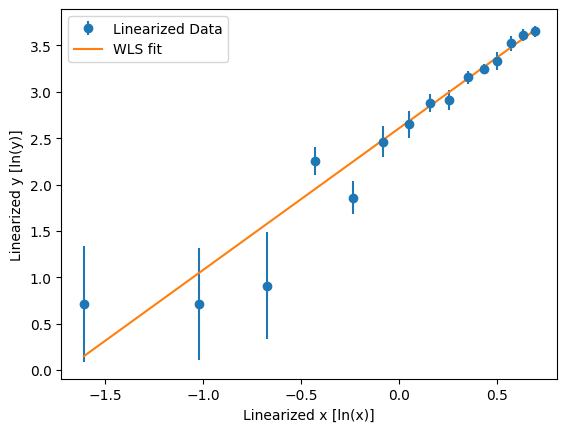

In [53]:
# Now estimate the best-fit parameters using the weighted least squares (WLS) method
# Hint: Some useful functions might include
# `np.diag` will create a diagonal matrix with specified values on the diagonal: https://numpy.org/doc/stable/reference/generated/numpy.diag.html
# `np.diagonal` can be used to get the diagonal of a square matrix: https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html

# calculate linearized error in y (propagate error)
yerr_lin = [y_ste[i]/y_avg[i] for i in range(len(y_ste))]

# calculate W - the weight matrix is diagonal, with Wii = 1/(sigma_ii)^2
W = np.diag([1 / (s ** 2) for s in yerr_lin])

#calculate covariance matrix
cov =  np.linalg.inv(X_lsT.dot(W).dot(X_ls))
wls_parameters = cov.dot(X_lsT).dot(W).dot(y_lin)

intercept_wls,slope_wls = wls_parameters

#plot the linearized data and fit
y_wls_lin = slope_wls * x_lin + intercept_wls
plt.errorbar(x_lin, y_lin, yerr=yerr_lin, label="Linearized Data", fmt='o')
plt.plot(x_lin, y_wls_lin, label="WLS fit")
plt.xlabel("Linearized x [ln(x)]")
plt.ylabel("Linearized y [ln(y)]")
plt.legend()

# Reorder the labels on the legend so that the data is first
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

In [54]:
# Now, determine A and p from the slope and intercept

p_wls = slope_wls
A_wls = exp(intercept_wls)

In [55]:
# Find the uncertainties in the WLS slope and intercept
from math import sqrt

# using diagonal entries of covariant matrix to get uncertainties
sigma_slope_wls = sqrt(cov[1, 1]) 
sigma_intercept_wls = sqrt(cov[0, 0])

# Determine the errors in A and p

sigma_p_wls = sigma_slope_wls
sigma_A_wls = sigma_intercept_wls * A_ols 

In [56]:
# print results for problem 1.c
print('PROBLEM 1.c RESULTS (WLS):')
print('A is', A_wls)
print('p is', p_wls)
print('uncertainty in A is', sigma_A_wls)
print('uncertainty in p is', sigma_p_wls)

PROBLEM 1.c RESULTS (WLS):
A is 13.54682687971852
p is 1.5266623761186664
uncertainty in A is 0.5826592018804977
uncertainty in p is 0.08848783880539025


### Question 1d

Plot the x, <y> data points with error bars on a log scale and the three fits as lines. Compare and discuss the results and any differences between OLS and WLS. Include a comment on when WLS is most appropriate versus OLS.

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jwdes\AppData\Local\Temp\ipykernel_24544\3692701901.py:9: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(x_lin, np.log(y_fit), label="$\chi^2$ Fit")
C:\Users\jwdes\AppData\Local\Temp\ipykernel_24544\3692701901.py:14: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title("Comparison of Fits ($\chi^2$, OLS, and WLS)")


' The general difference between OLS and WLS fits is that OLS equally weighs error with its data points (i.e., each data point has the same error/error bar), while in WLS the error depends \non the specific data point (i.e., each data point has its own error). WLS performs better when the data truly does have variable uncertainty, in where all data points were not measured to \nthe same uncertainty, while OLS performs better for data that has the same uncertainty. \n\nIn this example, WLS performs better than OLS because the first few data points (i.e., the lower ln(x) values) have much higher error compared to the last data points (i.e., the higher ln(x) \nvalues). '

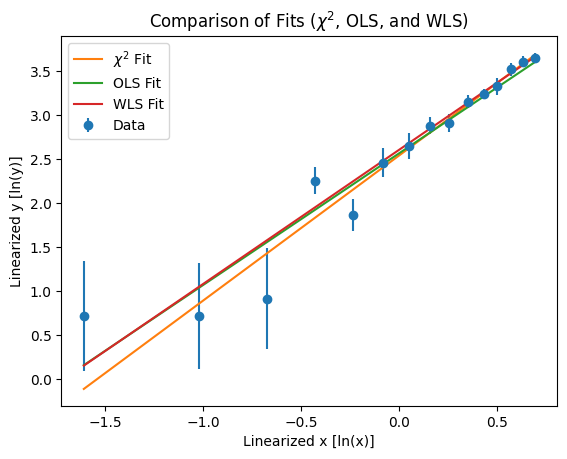

In [57]:
# plot data and all 3 fits in one plot to compare. comment on the fits! 

fig, ax = plt.subplots()

# Plot data with error bars on a log scale
ax.errorbar(x_lin, y_lin, yerr=yerr_lin, fmt='o', label="Data")

# Plot fits
ax.plot(x_lin, np.log(y_fit), label="$\chi^2$ Fit")
ax.plot(x_lin, y_ols_lin, label="OLS Fit")
ax.plot(x_lin, y_wls_lin, label="WLS Fit")

# Set plot title and labels
ax.set_title("Comparison of Fits ($\chi^2$, OLS, and WLS)")
ax.set_xlabel("Linearized x [ln(x)]")
ax.set_ylabel("Linearized y [ln(y)]")

# Add legend
ax.legend()

# Comment on OLS/WLS Fits

""" The general difference between OLS and WLS fits is that OLS equally weighs error with its data points (i.e., each data point has the same error/error bar), while in WLS the error depends 
on the specific data point (i.e., each data point has its own error). WLS performs better when the data truly does have variable uncertainty, in where all data points were not measured to 
the same uncertainty, while OLS performs better for data that has the same uncertainty. 

In this example, WLS performs better than OLS because the first few data points (i.e., the lower ln(x) values) have much higher error compared to the last data points (i.e., the higher ln(x) 
values). """


# Question 2

Data for problem 2 represents how the extension per base pair (b) of double-stranded DNA
changes with incubation time (t) upon binding with a ligand. Fit the data to

$b(t) = b_{eq} - [b_{eq} - 0.355]e^{-kt}$

and find the best values for association rate k and equilibrium extension beq.
Report the values you found for minimized $\chi^{2}$, reduced $\chi^{2}$, and fitting parameters k and beq,
along with their uncertainties. (Find the uncertainties in the parameters using the $\chi^{2}_{min} + 1$
method in two dimensions). Plot the data with error bars. Show the fitted curve. Comment on the
goodness of the fit.

In [58]:
# Read in an print the data
data2 = pd.read_csv("data_prob2.txt", sep='\t')

data2

,t(mins),x1,x2,x3
0,0.000,0.342,0.352,0.358
1,0.332,0.363,0.358,0.365
2,1.069,0.367,0.362,0.370
3,1.806,0.371,0.366,0.373
4,2.542,0.375,0.370,0.376
5,3.279,0.379,0.373,0.379
6,4.015,0.382,0.377,0.382
7,4.751,0.384,0.380,0.384
8,5.487,0.387,0.383,0.386
9,6.223,0.388,0.384,0.389


In [59]:
# get y column names and filter data2 DataFrame for y data values
x_columns = data2.columns[1:]
data2_xvalues = data2[x_columns].to_numpy()

# calculate average x `x_avg` and standard error in x `x_ste`
x_avg = [np.mean(x) for x in data2_xvalues]
# std function default uses 0 delta degrees of freedom, but we should use ddof=1 to unbias data
x_ste = [np.std(x_data, ddof=1) / np.sqrt(len(x_data)) for x_data in data2_xvalues]

# Show the calculated values
pd.DataFrame({ "t": data2["t(mins)"], "x_avg": x_avg, "x_ste": x_ste })

,t,x_avg,x_ste
0,0.000,0.350667,0.004667
1,0.332,0.362000,0.002082
2,1.069,0.366333,0.002333
3,1.806,0.370000,0.002082
4,2.542,0.373667,0.001856
5,3.279,0.377000,0.002000
6,4.015,0.380333,0.001667
7,4.751,0.382667,0.001333
8,5.487,0.385333,0.001202
9,6.223,0.387000,0.001528


In [60]:
# Extract the time data from the DataFrame
t = data2['t(mins)']

# Define the base pair extension formula
def base_pair_ext(t, b_eq, k):
    return b_eq - (b_eq-0.355)*np.exp(-k*t)

# Define chi^2 calculation for the base pair extension formula
def chi_squared_bpext(p):
    # p is an array of parameters b_eq (0th entry) and k (1st entry)
    x_pred = base_pair_ext(t, p[0], p[1])
    diff_bpext = x_avg - x_pred
    chi_sq_bpext = np.sum((diff_bpext/x_ste)**2)
    return chi_sq_bpext

In [61]:
# minimize chi^2 using sp.optimize.minimize and an initial guess for parameters
initial_guess = [2,0.1] # initial guess based on data
minimum2 = sp.optimize.minimize(chi_squared_bpext, initial_guess, tol=0.0001)

In [74]:
# extract minimized chi^2, b_eq, and k from 'minimum2'
chi_sq_min2 = minimum2.fun
b_eq, k = minimum2.x

In [63]:
# calculate degrees of freedeom dof2 and reduced chi^2
dof2 = len(x_avg) - len(initial_guess) # 2 fitting parameters
chi_sq_red2 = chi_sq_min2 / dof2

'The fit looks like it captures the trend of the data very well, as the fit line stays within the error bars for all data points.'

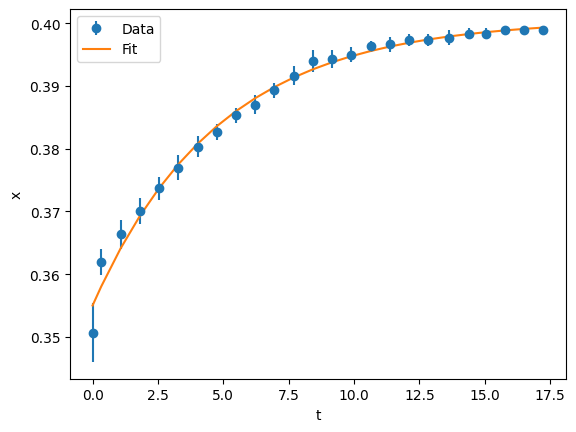

In [64]:
# Plot the data together with the fit

x_fit = base_pair_ext(t, b_eq, k)
data_plot = plt.errorbar(t, x_avg, yerr=x_ste, fmt='o', label="Data")
fit_plot = plt.plot(t, x_fit, label="Fit")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()

# Reorder the labels on the legend so that the data is first
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[i] for i in order], [labels[i] for i in order])

# Comment:

"""The fit looks like it captures the trend of the data very well, as the fit line stays within the error bars for all data points."""

In [70]:
# Find the uncertainties in b_eq and k

# To find where the chi squared value is chi squared_min + 1, do a grid search near the minimum
# We create a grid of possible b and keq values to search for where chi_sq = chi_sq_min + 1
brange = 0.01
krange =  0.01
possible_beqs = np.linspace(b_eq-brange, b_eq+brange, 100)
possible_ks = np.linspace(k-krange, k+krange, 100)

# Loop over every cell in our grid and compute what chi squared is for that beq and k
# Store our results in a matrix whose indices correspond to the beq and k 

chi_sq_grid2 = np.zeros((possible_beqs.shape[0], possible_ks.shape[0]))
for i, beqc in enumerate(possible_beqs):
    for j, kc in enumerate(possible_ks):
        chi_sq_grid2[i, j] = chi_squared_bpext([beqc, kc])     

lte_min_plus_2 = chi_sq_grid2 <= (chi_sq_min2 + 1)

beq_indices = lte_min_plus_2.any(axis=0)
k_indices = lte_min_plus_2.any(axis=1)

beq_min, beq_max = minmax(possible_beqs[beq_indices])
k_min, k_max = minmax(possible_ks[k_indices])

sigma_beq = (beq_max - beq_min)/2
sigma_k = (k_max - k_min)/2

<>:14: SyntaxWarning: invalid escape sequence '\c'
<>:14: SyntaxWarning: invalid escape sequence '\c'
C:\Users\jwdes\AppData\Local\Temp\ipykernel_24544\510444039.py:14: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Mask Matrix for $\chi^2 \leq \chi^2_{min}+1$")


Text(0.5, 1.0, 'Mask Matrix for $\\chi^2 \\leq \\chi^2_{min}+1$')

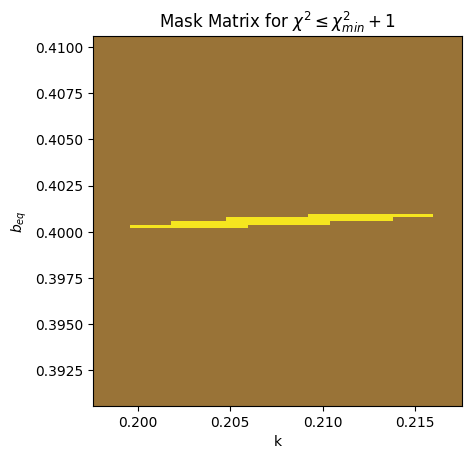

In [71]:
# This plots the chi-squared grid as an image
# and uses the extent to set the axis labels correctly
# An image mask is then plotted over the grid
plt.imshow(chi_sq_grid2)
bmin, bmax = minmax(possible_beqs)
kmin, kmax = minmax(possible_ks)

mask2 = lte_min_plus_2.astype(int)

# Replace `mask2` with your mask variable
plt.imshow(mask2, alpha=0.5, extent=[kmin, kmax, bmin, bmax], aspect=(kmax-kmin)/(bmax-bmin))
plt.xlabel("k")
plt.ylabel("$b_{eq}$")
plt.title("Mask Matrix for $\chi^2 \leq \chi^2_{min}+1$")


In [72]:
# print problem 2 results

print('PROBLEM 2 RESULTS:')

print('min chi^2 is', chi_sq_min2)
print('b_eq is', b_eq)
print('k is', k)
print('reduced chi^2 is', chi_sq_red2)
print('uncertainty in b_eq is', sigma_beq)
print('uncertainty in k is', sigma_k)

PROBLEM 2 RESULTS:
min chi^2 is 9.565142842239197
b_eq is 0.40058551269865106
k is 0.20757088871846927
reduced chi^2 is 0.41587577574953033
uncertainty in b_eq is 0.008181818181818179
uncertainty in k is 0.000303030303030305
